# Importing required libraries

In [128]:
#Importing all essential liabraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Data Collection and Processing

In [129]:
df=pd.read_csv('C:\\Users\\santhosh\\Downloads\\credit_risk_dataset.csv')

In [130]:
# number of rows and columns
df.shape

(32581, 12)

In [131]:
# printing the first 5 rows of the dataframe
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [133]:
# statistical measures
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [134]:
# number of missing values in each column
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [135]:
# dropping the missing values
df=df.dropna()


In [136]:
# number of missing values in each column after dropping 
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [137]:
df['loan_status']=df['loan_status'].astype('str')

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_status                 28638 non-null  object 
 9   loan_percent_income         28638 non-null  float64
 10  cb_person_default_on_file   28638 non-null  object 
 11  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 2.8+ MB


# EDA

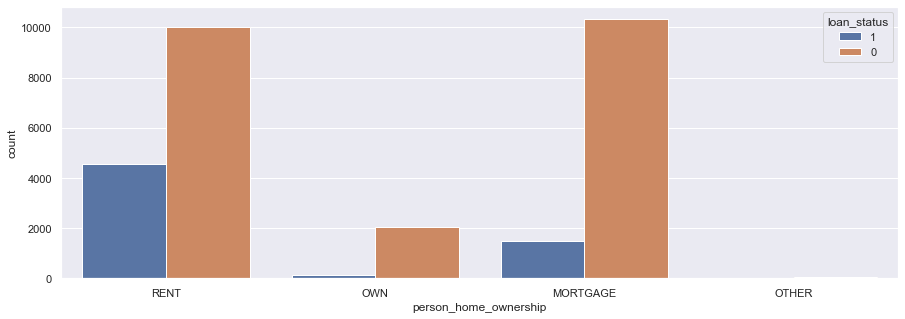

In [139]:
#person_home_ownership & loan_status
sns.countplot('person_home_ownership',hue='loan_status',data=df)
sns.set(rc={'figure.figsize':(15,5)})

<AxesSubplot:xlabel='loan_intent', ylabel='count'>

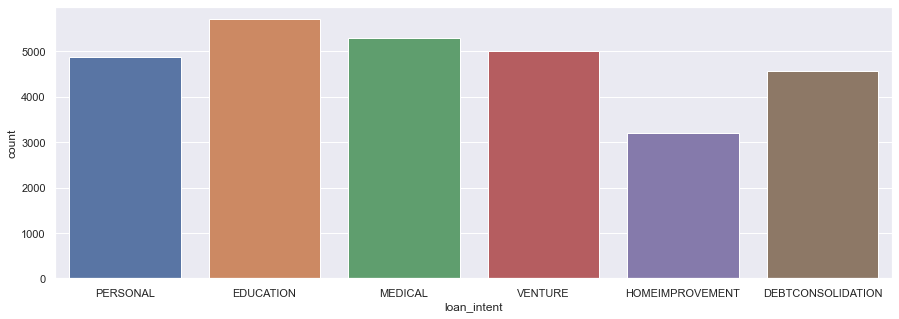

In [141]:
#person_home_ownership & loan_status
sns.countplot('loan_intent',data=df)

<AxesSubplot:xlabel='loan_status', ylabel='count'>

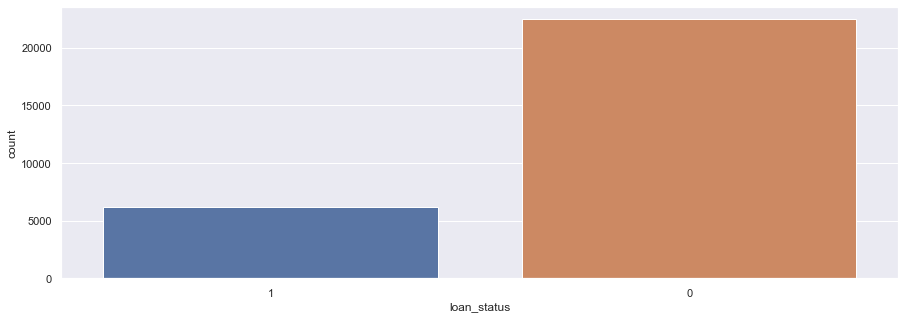

In [142]:
#person_home_ownership & loan_status
sns.countplot('loan_status',data=df)

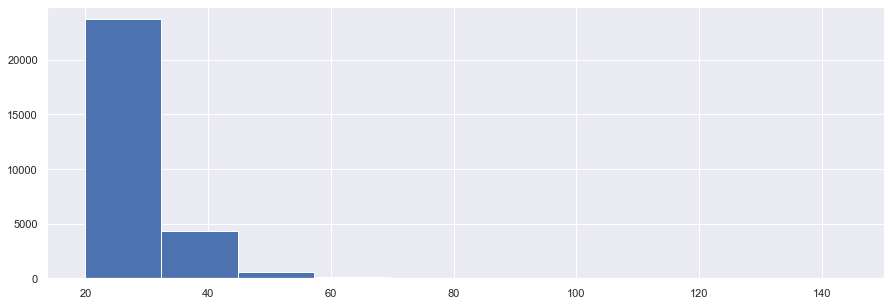

In [144]:
plt.hist(df['person_age'])
plt.show()

# EDA insights

 own home people are less defaulters
    
 rent home pople are more defaulters

 non defaulters are more than defaulters
    
 most people are taking loan for education

 medical is the second highest reason for loan
    
 people who are taking loan for home improvement are less

# Data Transformation

One hot encoding

In [145]:
df=pd.get_dummies(df,drop_first=True)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28638 entries, 0 to 32580
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_age                   28638 non-null  int64  
 1   person_income                28638 non-null  int64  
 2   person_emp_length            28638 non-null  float64
 3   loan_amnt                    28638 non-null  int64  
 4   loan_int_rate                28638 non-null  float64
 5   loan_percent_income          28638 non-null  float64
 6   cb_person_cred_hist_length   28638 non-null  int64  
 7   person_home_ownership_OTHER  28638 non-null  uint8  
 8   person_home_ownership_OWN    28638 non-null  uint8  
 9   person_home_ownership_RENT   28638 non-null  uint8  
 10  loan_intent_EDUCATION        28638 non-null  uint8  
 11  loan_intent_HOMEIMPROVEMENT  28638 non-null  uint8  
 12  loan_intent_MEDICAL          28638 non-null  uint8  
 13  loan_intent_PERS

In [149]:
df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,loan_status_1,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,0.59,3,0,0,1,...,1,0,0,0,1,0,0,0,1,1
1,21,9600,5.0,1000,11.14,0.10,2,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,25,9600,1.0,5500,12.87,0.57,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,0.53,2,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,0.55,4,0,0,1,...,0,0,0,1,0,0,0,0,1,1


# separating the data and label

In [150]:
# separating the data and label
X=df.drop('loan_status_1',axis=1)

In [151]:
y=df['loan_status_1']

In [152]:
print(X)

       person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0              22          59000              123.0      35000          16.02   
1              21           9600                5.0       1000          11.14   
2              25           9600                1.0       5500          12.87   
3              23          65500                4.0      35000          15.23   
4              24          54400                8.0      35000          14.27   
...           ...            ...                ...        ...            ...   
32576          57          53000                1.0       5800          13.16   
32577          54         120000                4.0      17625           7.49   
32578          65          76000                3.0      35000          10.99   
32579          56         150000                5.0      15000          11.48   
32580          66          42000                2.0       6475           9.99   

       loan_percent_income 

In [153]:
print(y)

0        1
1        0
2        1
3        1
4        1
        ..
32576    0
32577    0
32578    1
32579    0
32580    0
Name: loan_status_1, Length: 28638, dtype: uint8


0 --> non default

1 --> default

# Train test split

In [154]:
from sklearn.model_selection import train_test_split 

In [155]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

# Model building

# K-NN classifier

In [156]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [157]:
from sklearn.metrics import accuracy_score

In [158]:
y_test_prediction = classifier.predict(X_test)
accuracy_score_knn = accuracy_score(y_test_prediction,y_test)

In [160]:
accuracy_score_knn

0.8402234636871508

# Decision tree classifier

In [161]:
from sklearn.tree import DecisionTreeClassifier
decision=DecisionTreeClassifier()
decision.fit(X_train,y_train)

DecisionTreeClassifier()

In [163]:
y_test_prediction_dt=decision.predict(X_test)
accuracy_score_dt = accuracy_score(y_test_prediction_dt,y_test)
accuracy_score_dt

0.8941340782122905

# Logistic regression

In [164]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

In [165]:
y_test_prediction_lr=logistic.predict(X_test)
accuracy_score_lr = accuracy_score(y_test_prediction_lr,y_test)
accuracy_score_lr

0.8108938547486033

# RandomForestClassifier

In [166]:
from sklearn.ensemble import RandomForestClassifier
randomforest=RandomForestClassifier()
randomforest.fit(X_train,y_train)

RandomForestClassifier()

In [168]:
y_test_prediction_rf=randomforest.predict(X_test)
accuracy_score_rf = accuracy_score(y_test_prediction_rf,y_test)
accuracy_score_rf

0.9336592178770949

# SVC

In [169]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [170]:
y_test_prediction_svc=svc.predict(X_test)
accuracy_score_svc = accuracy_score(y_test_prediction_svc,y_test)
accuracy_score_svc

0.7896648044692738

# Naive bayes

In [93]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [171]:
y_test_prediction_gnb=gnb.predict(X_test)
accuracy_score_gnb = accuracy_score(y_test_prediction_gnb,y_test)
accuracy_score_gnb

0.8187150837988827

# ADABoost

In [172]:
from sklearn.ensemble import AdaBoostClassifier
adab_clf = AdaBoostClassifier()
adab_clf.fit(X_train,y_train)

AdaBoostClassifier()

In [173]:
y_test_prediction_adab = adab_clf.predict(X_test)
accuracy_score_adab = accuracy_score(y_test_prediction_adab,y_test)
accuracy_score_adab

0.888268156424581

# Bagging

In [174]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier()
bg.fit(X_train,y_train)

BaggingClassifier()

In [175]:
y_test_prediction_bg = bg.predict(X_test)
accuracy_score_bg = accuracy_score(y_test_prediction_bg,y_test)
accuracy_score_bg

0.9318435754189944

In [176]:
score={'Algorithms':['KNN','Decision tree','logistic regression','random forest','svc','naive bayes','ada boost','Bagging'],'Score':[accuracy_score_knn,accuracy_score_dt,accuracy_score_lr,accuracy_score_rf,accuracy_score_svc,accuracy_score_gnb,accuracy_score_adab,accuracy_score_bg]}

In [177]:
score

{'Algorithms': ['KNN',
  'Decision tree',
  'logistic regression',
  'random forest',
  'svc',
  'naive bayes',
  'ada boost',
  'Bagging'],
 'Score': [0.8402234636871508,
  0.8941340782122905,
  0.8108938547486033,
  0.9336592178770949,
  0.7896648044692738,
  0.8187150837988827,
  0.888268156424581,
  0.9318435754189944]}

In [178]:
scores=pd.DataFrame(score)
scores

,Algorithms,Score
0,KNN,0.840223
1,Decision tree,0.894134
2,logistic regression,0.810894
3,random forest,0.933659
4,svc,0.789665
5,naive bayes,0.818715
6,ada boost,0.888268
7,Bagging,0.931844


<BarContainer object of 8 artists>

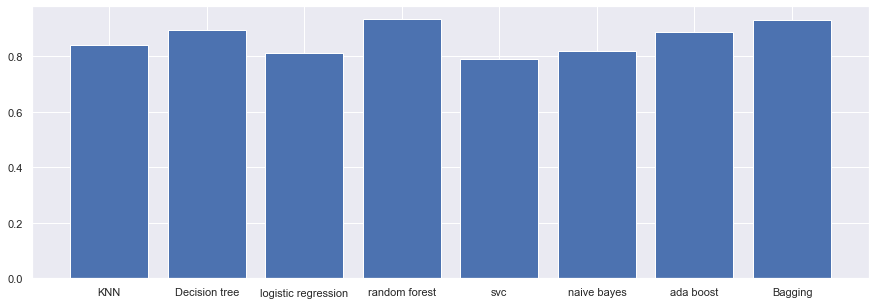

In [187]:
x=np.array(scores['Algorithms'])
y=np.array(scores['Score'])
plt.bar(x,y)

# Random forest and bagging algorithms are performing well